**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

**Loading the dataset**

In [2]:
data = pd.read_csv('/content/concrete.csv')

In [3]:
data.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
print("Missing values in the dataset:\n", data.isnull().sum())

Missing values in the dataset:
 Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
strength                                                 0
dtype: int64


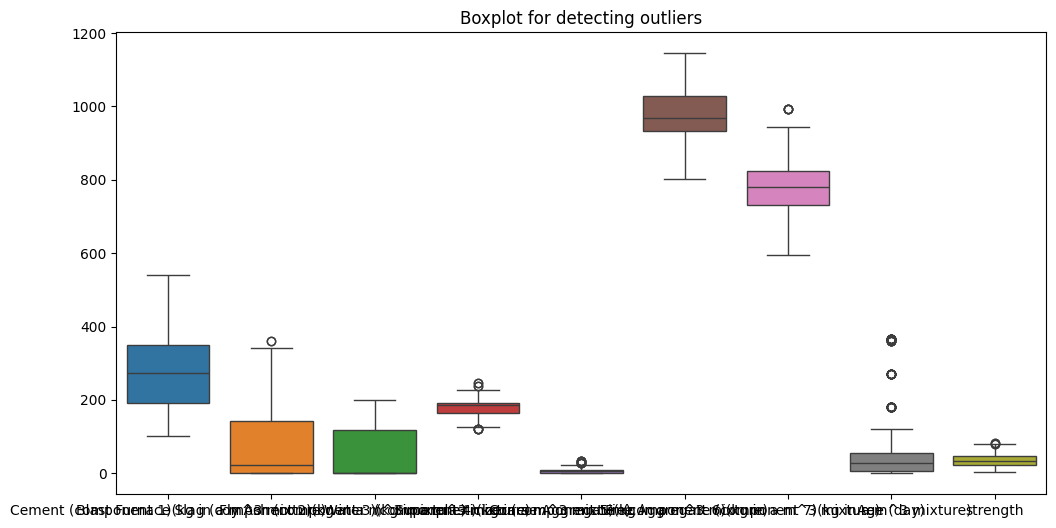

In [5]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.title("Boxplot for detecting outliers")
plt.show()

In [6]:
scaler = StandardScaler()
features = data.drop('strength', axis=1)
target = data['strength']
scaled_features = scaler.fit_transform(features)

In [7]:
data_scaled = pd.DataFrame(scaled_features, columns=features.columns)
data_scaled['strength'] = target

In [8]:
X = data_scaled.drop('strength', axis=1)
y = data_scaled['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets created.")

Training and testing sets created.


**LinearRegression**

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

**RandomForestRegressor**

In [10]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [11]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [12]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2


lr_results = evaluate_model(lr_model, X_test, y_test)
print("Linear Regression - MAE, MSE, RMSE, R2:", lr_results)


rf_results = evaluate_model(rf_model, X_test, y_test)
print("Random Forest - MAE, MSE, RMSE, R2:", rf_results)


gb_results = evaluate_model(gb_model, X_test, y_test)
print("Gradient Boosting - MAE, MSE, RMSE, R2:", gb_results)

Linear Regression - MAE, MSE, RMSE, R2: (7.745559243921434, 95.97094009110688, 9.796475901624364, 0.6275531792314848)
Random Forest - MAE, MSE, RMSE, R2: (3.73848481449376, 29.942186389395943, 5.471945393495438, 0.8837994905853568)
Gradient Boosting - MAE, MSE, RMSE, R2: (4.135014150874571, 30.176898188589746, 5.493350360990071, 0.8828886141958622)


In [13]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_
best_rf_results = evaluate_model(best_rf_model, X_test, y_test)
print("Tuned Random Forest - MAE, MSE, RMSE, R2:", best_rf_results)

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest - MAE, MSE, RMSE, R2: (3.790041746439244, 30.717388908911364, 5.542327030130156, 0.8807910620592719)


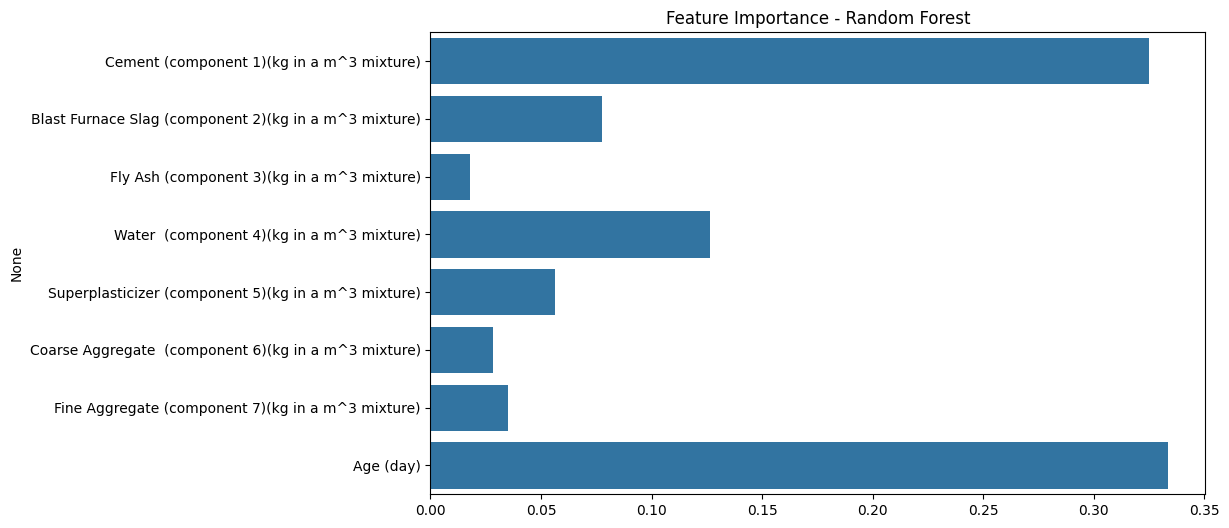

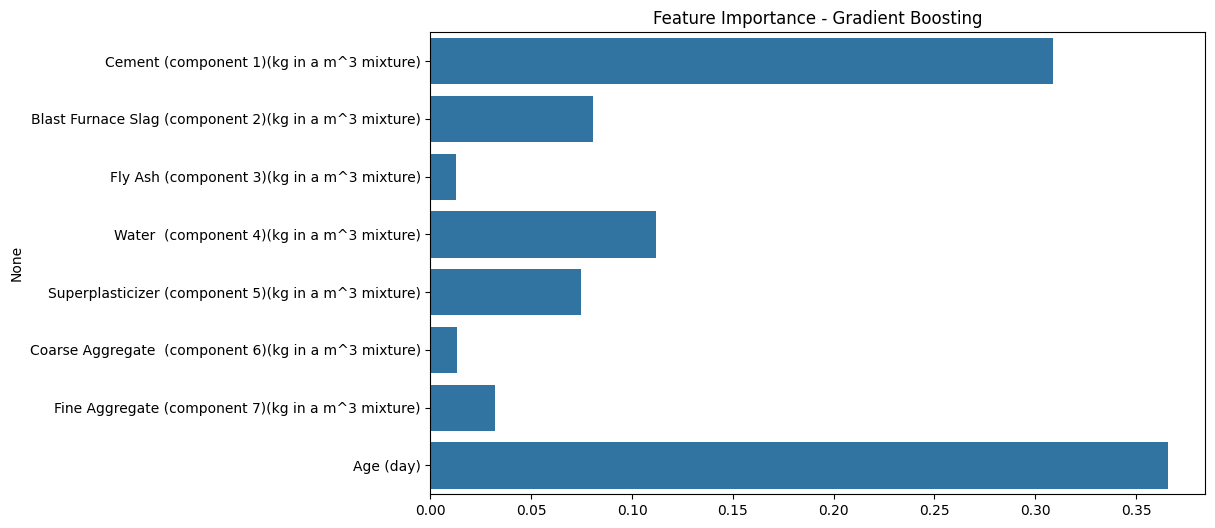

In [14]:
importances_rf = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances_rf, y=feature_names)
plt.title('Feature Importance - Random Forest')
plt.show()

importances_gb = gb_model.feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(x=importances_gb, y=feature_names)
plt.title('Feature Importance - Gradient Boosting')
plt.show()


**Comparative Analysis and Conclusion**

In [15]:
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
results = [lr_results, rf_results, gb_results]


comparison_df = pd.DataFrame(results, columns=['MAE', 'MSE', 'RMSE', 'R2'], index=models)
print(comparison_df)

                        MAE        MSE      RMSE        R2
Linear Regression  7.745559  95.970940  9.796476  0.627553
Random Forest      3.738485  29.942186  5.471945  0.883799
Gradient Boosting  4.135014  30.176898  5.493350  0.882889
